<a href="https://colab.research.google.com/github/kiran1465313/satellite_sr/blob/main/01_dataset_preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!mkdir -p data/div2k
%cd data/div2k
!wget http://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_train_HR.zip
!wget http://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_train_LR_bicubic_X4.zip
!unzip DIV2K_train_HR.zip
!unzip DIV2K_train_LR_bicubic_X4.zip

/content/data/div2k
--2025-06-24 12:16:33--  http://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_train_HR.zip
Resolving data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)... 129.132.52.178, 2001:67c:10ec:36c2::178
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.178|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_train_HR.zip [following]
--2025-06-24 12:16:33--  https://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_train_HR.zip
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.178|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3530603713 (3.3G) [application/zip]
Saving to: ‘DIV2K_train_HR.zip’

DIV2K_train_HR.zip  100%[===================>]   3.29G  24.0MB/s    in 2m 22s  

2025-06-24 12:18:56 (23.8 MB/s) - ‘DIV2K_train_HR.zip’ saved [3530603713/3530603713]

--2025-06-24 12:18:56--  http://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_train_LR_bicubic_X4.zip
R

In [31]:
!pip install tensorflow opencv-python scikit-image matplotlib

In [32]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D

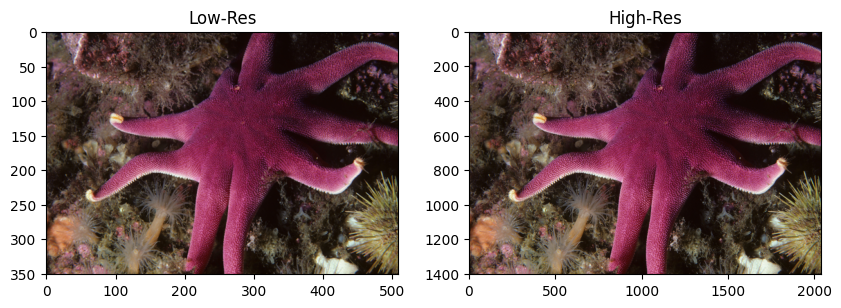

In [33]:
hr_img = cv2.imread('DIV2K_train_HR/0001.png')
lr_img = cv2.imread('DIV2K_train_LR_bicubic/X4/0001x4.png')


lr_img = cv2.cvtColor(lr_img, cv2.COLOR_BGR2RGB)
hr_img = cv2.cvtColor(hr_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title("Low-Res")
plt.imshow(lr_img)
plt.subplot(1,2,2)
plt.title("High-Res")
plt.imshow(hr_img)
plt.show()

In [ ]:
#model building
def build_srcnn():
    model = Sequential()
    model.add(Conv2D(64, (9, 9), activation='relu', padding='same', input_shape=(None, None, 1)))
    model.add(Conv2D(32, (1, 1), activation='relu', padding='same'))
    model.add(Conv2D(1, (5, 5), activation='linear', padding='same'))
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model
